In [1]:
%matplotlib inline

In [2]:
import json
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
root = '../models/final_damage/'

In [6]:
op_graphs = 'graphs'
if not os.path.exists(op_graphs):
    os.makedirs(op_graphs)

In [7]:
model_cls = os.path.join(root, 'cls')
model_seg = os.path.join(root, 'seg')
model_mt = os.path.join(root, 'mt')

In [8]:
def read_json(filepath):
    with open(filepath) as f:
        return json.load(f)

In [9]:
stats_cls = read_json(os.path.join(model_cls, 'plots', 'stats.json'))
stats_seg = read_json(os.path.join(model_seg, 'plots', 'stats.json'))
stats_mt = read_json(os.path.join(model_mt, 'plots', 'stats.json'))

In [10]:
stats_mt.keys(), stats_cls.keys(), stats_seg.keys()

(dict_keys(['epochs', 'train_cls_acc', 'train_cls_loss', 'train_seg_acc', 'train_seg_loss', 'train_loss', 'val_cls_acc', 'val_seg_acc', 'val_loss', 'val_cls_loss', 'val_seg_loss']),
 dict_keys(['epochs', 'train_acc', 'train_loss', 'val_acc', 'val_loss']),
 dict_keys(['epochs', 'train_acc', 'train_loss', 'val_acc', 'val_loss']))

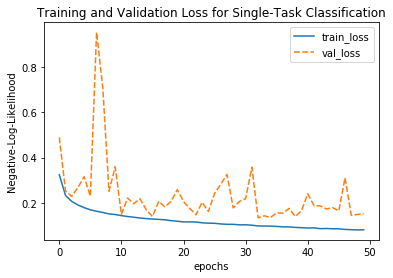

In [17]:
# single task classification overfitting?
data = pd.DataFrame({
    'train_loss':stats_cls['train_loss'],
    'val_loss':stats_cls['val_loss']
})
fig = sns.lineplot(data=data)
plt.xlabel("epochs")
plt.ylabel("Negative-Log-Likelihood")
plt.title("Training and Validation Loss for Single-Task Classification")
plt.show(fig)

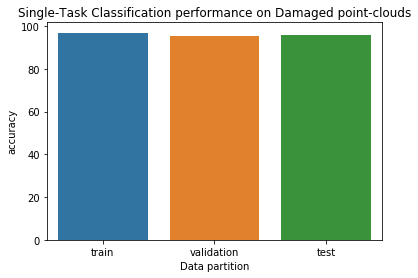

In [20]:
# single task classification performance
data = pd.DataFrame({'accuracy': [96.90, 95.45, 95.80], 'set': ['train', 'validation', 'test']})
fig = sns.barplot(x = 'set', y = 'accuracy', data = data)
plt.xlabel("Data partition")
plt.ylabel("accuracy")
plt.title("Single-Task Classification performance on Damaged point-clouds") # You can comment this line out if you don't need title
plt.show(fig)

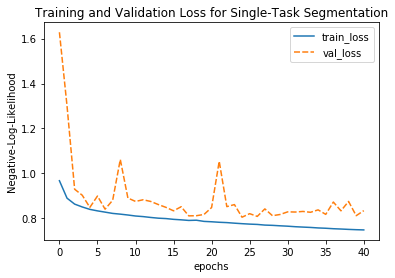

In [21]:
# single task segmentation overfitting?
data = pd.DataFrame({
    'train_loss':stats_seg['train_loss'],
    'val_loss':stats_seg['val_loss']
})
fig = sns.lineplot(data=data)
plt.xlabel("epochs")
plt.ylabel("Negative-Log-Likelihood")
plt.title("Training and Validation Loss for Single-Task Segmentation")
plt.show(fig)

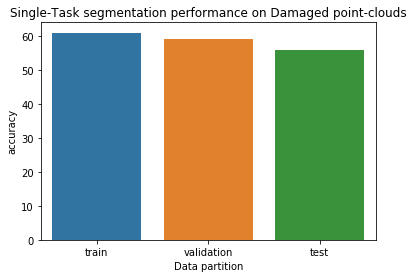

In [22]:
# single task segmentation performance
data = pd.DataFrame({'accuracy': [60.92, 58.97, 55.90], 'set': ['train', 'validation', 'test']})
fig = sns.barplot(x = 'set', y = 'accuracy', data = data)
plt.xlabel("Data partition")
plt.ylabel("accuracy")
plt.title("Single-Task segmentation performance on Damaged point-clouds") # You can comment this line out if you don't need title
plt.show(fig)

In [9]:
# accuracy comparison of MT and ST
cls_epoch, cls_acc, cls_loss = stats_cls['epochs'], stats_cls['train_acc'], stats_cls['train_loss']
mt_cls_epoch, mt_cls_acc, mt_cls_loss = stats_mt['epochs'], stats_mt['train_cls_acc'], stats_mt['train_cls_loss']

In [10]:
max(cls_epoch), max(mt_cls_epoch)

(72, 48)

In [11]:
max(cls_acc[:48]), max(mt_cls_acc)

(0.9311211664152841, 0.9369448634154517)

In [12]:
min(cls_loss[:48]), min(mt_cls_loss)

(2.8095267225354683, 2.7955515167711966)

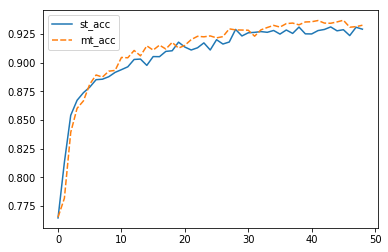

In [13]:
# train classification accuracy: ST and MT
data = pd.DataFrame({'epoch':mt_cls_epoch,
                    'st_acc':cls_acc[:min(len(mt_cls_epoch), len(cls_epoch))],
                    'mt_acc':mt_cls_acc[:min(len(mt_cls_epoch), len(cls_epoch))]})
sns.lineplot(data=data[['st_acc', 'mt_acc']])
data.to_csv(os.path.join(op_graphs, 'train_acc_stmt.csv'))

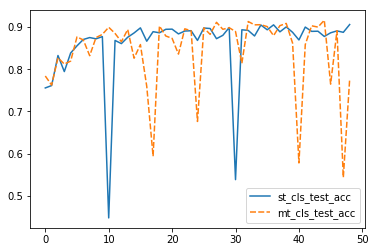

In [13]:
# validation classification accuracy: ST and MT
data = pd.DataFrame({'epoch':mt_cls_epoch,
                    'st_cls_test_acc':stats_cls['test_acc'][:min(len(mt_cls_epoch), len(cls_epoch))],
                    'mt_cls_test_acc':stats_mt['test_cls_acc'][:min(len(mt_cls_epoch), len(cls_epoch))]})
sns.lineplot(data=data[['st_cls_test_acc', 'mt_cls_test_acc']])
data.to_csv(os.path.join(op_graphs, 'val_acc_stmt.csv'))

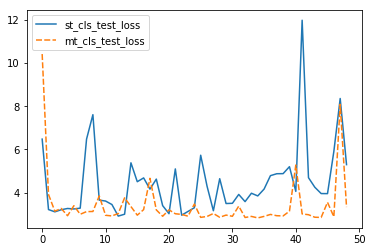

In [14]:
# validation classification loss: ST and MT
data = pd.DataFrame({'epoch':mt_cls_epoch,
                    'st_cls_test_loss':stats_cls['test_loss'][:min(len(mt_cls_epoch), len(cls_epoch))],
                    'mt_cls_test_loss':stats_mt['test_cls_loss'][:min(len(mt_cls_epoch), len(cls_epoch))]})
sns.lineplot(data=data[['st_cls_test_loss', 'mt_cls_test_loss']])
data.to_csv(os.path.join(op_graphs, 'val_loss_cls_stmt.csv'))

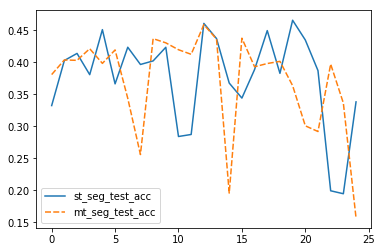

In [15]:
# validation segmentation accuracy: ST and MT
data = pd.DataFrame({'epoch':min(len(stats_mt['epochs']), len(stats_seg['epochs'])),
                    'st_seg_test_acc':stats_seg['test_acc'][:min(len(stats_mt['epochs']), len(stats_seg['epochs']))],
                    'mt_seg_test_acc':stats_mt['test_seg_acc'][:min(len(stats_mt['epochs']), len(stats_seg['epochs']))]})
sns.lineplot(data=data[['st_seg_test_acc', 'mt_seg_test_acc']])
data.to_csv(os.path.join(op_graphs, 'val_acc_seg_stmt.csv'))

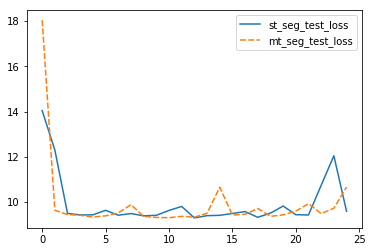

In [16]:
# validation segmentation loss: ST and MT
data = pd.DataFrame({'epoch':min(len(stats_mt['epochs']), len(stats_seg['epochs'])),
                    'st_seg_test_loss':stats_seg['test_loss'][:min(len(stats_mt['epochs']), len(stats_seg['epochs']))],
                    'mt_seg_test_loss':stats_mt['test_seg_loss'][:min(len(stats_mt['epochs']), len(stats_seg['epochs']))]})
sns.lineplot(data=data[['st_seg_test_loss', 'mt_seg_test_loss']])
data.to_csv(os.path.join(op_graphs, 'val_loss_seg_stmt.csv'))

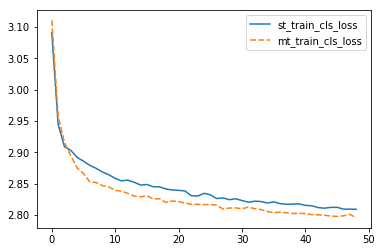

In [23]:
# train classification loss: ST and MT
data = pd.DataFrame({
    'epoch':mt_cls_epoch,
    'st_train_cls_loss': stats_cls['train_loss'][:min(len(mt_cls_epoch), len(cls_epoch))],
    'mt_train_cls_loss': stats_mt['train_cls_loss'][:min(len(mt_cls_epoch), len(cls_epoch))]
})
sns.lineplot(data=data[['st_train_cls_loss', 'mt_train_cls_loss']])
data.to_csv(os.path.join(op_graphs, 'train_cls_loss_stmt.csv'))

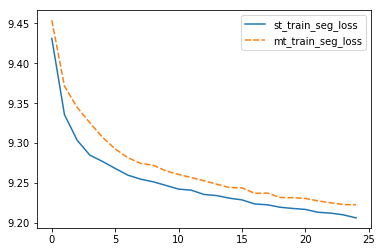

In [32]:
# train segmentation loss: ST and MT
data = pd.DataFrame({
    'epoch':min(len(stats_mt['epochs']), len(stats_seg['epochs'])),
    'st_train_seg_loss': stats_seg['train_loss'][:min(len(stats_mt['epochs']), len(stats_seg['epochs']))],
    'mt_train_seg_loss': stats_mt['train_seg_loss'][:min(len(stats_mt['epochs']), len(stats_seg['epochs']))]
})
sns.lineplot(data=data[['st_train_seg_loss', 'mt_train_seg_loss']])
data.to_csv(os.path.join(op_graphs, 'train_seg_loss_stmt.csv'))

In [15]:
# train segmentation accuracy: ST and MT
# accuracy comparison of MT and ST
st_train_seg_epoch, st_train_seg_acc, st_train_seg_loss = stats_seg['epochs'], stats_seg['train_acc'], stats_seg['train_loss']
mt_train_seg_epoch, mt_train_seg_acc, mt_train_seg_loss = stats_mt['epochs'], stats_mt['train_seg_acc'], stats_mt['train_seg_loss']
data = pd.DataFrame({'epoch':range(min(len(st_train_seg_epoch), len(mt_train_seg_epoch))),
                    'st_train_seg_acc': st_train_seg_acc[:min(len(mt_train_seg_epoch), len(st_train_seg_epoch))],
                    'mt_train_seg_acc':mt_train_seg_acc[:min(len(mt_train_seg_epoch), len(st_train_seg_epoch))]})
sns.lineplot(data=data[['st_train_seg_acc', 'mt_train_seg_acc']])
data.to_csv(os.path.join(op_graphs, 'train_seg_acc_stmt.csv'))

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [16]:
data = pd.DataFrame({'epoch':range(min(len(st_train_seg_epoch), len(mt_train_seg_epoch))),
                    'st_train_seg_loss': st_train_seg_loss[:min(len(mt_train_seg_epoch), len(st_train_seg_epoch))],
                    'mt_train_seg_loss':mt_train_seg_loss[:min(len(mt_train_seg_epoch), len(st_train_seg_epoch))]})
sns.lineplot(data=data[['st_train_seg_loss', 'mt_train_seg_loss']])
data.to_csv(os.path.join(op_graphs, 'train_seg_loss_stmt.csv'))

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [17]:
max_st_cls_test_acc = max(stats_cls['test_acc'])
max_mt_cls_test_acc = max(stats_mt['test_cls_acc'])
max_st_seg_test_acc = max(stats_seg['test_acc'])
max_mt_seg_test_acc = max(stats_mt['test_seg_acc'])
max_st_cls_test_acc, max_mt_cls_test_acc, max_st_seg_test_acc, max_mt_seg_test_acc

(0.9178598342125094,
 0.9163526752072344,
 0.46562321024868125,
 0.47798643556895254)

In [ ]:
# classification comparison pointNet and pointCNN
model_pcnn = os.path.join(root, 'final_cls_pcnn500_ownsub')
stats_pcnn = read_json(os.path.join(model_pcnn, 'plots', 'stats.json'))
pcnn_test_cls_acc = max(stats_pcnn['test_acc'])
pn_test_cls_acc = max(stats_cls['test_acc'])
pcnn_test_cls_acc, pn_test_cls_acc

In [10]:
stats_seg['train_acc'].index(max(stats_seg['train_acc']))

24

In [11]:
stats_seg['test_acc'].index(max(stats_seg['test_acc']))

19

In [12]:
stats_mt['test_seg_acc'].index(max(stats_mt['test_seg_acc']))

38

In [13]:
stats_mt['train_seg_acc'].index(max(stats_mt['train_seg_acc']))

48